<a href="https://colab.research.google.com/github/Salciano/Python/blob/main/PredictingHouseMarket(WIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analizing the Housing Market

It is possible to make predictious about the housing market. This is not magic or pseudo-science, but data-driven analytics and computing algorithms, empowered by machine learning.

However, to make credible predictions, we need good, fact-based data, because our predictions are only as good as our data. Then, we can analyze the data to help understand it and what drives market prices, before making predictions.
With this said, bear in mind that there are always margins for error.

Also, mind that the predictions here are made within the context of the dataset (Boston 2017) in mind, as a proof of concept. Meaning, this is not an attempt to predict all housing markets everywhere, anytime or anything like that.

So, without further ado, let's start by importing the market data, coding libraries and so on that will be required for this...

In [38]:
#@title Importing Data & Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# The Boston Housing Dataset 2017 derived from information collected by the US Census Service concerning housing in the area of Boston MA. Also available with scikit-learn, using load_boston()
df = pd.read_csv("https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/d4332a3056f44e1a1dec9600a31f21c8_boston.csv", header = 0) # imported on 27.12.2025

# Let's check our by reproducing it

#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', None)

display(df)

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0
502,Winthrop,1802,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0
503,Winthrop,1803,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0
504,Winthrop,1804,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0


#Understading Raw Data

Great, we have our data! All 506 properties!

Now, if it looks incomprehensible. Don't worry. This is a common issue with raw datasets.
Otherwise, if you understood this, great! Just skip over this part.

So, let's try to decypher this mess...

* The dataset is structured in 16 columns and 506 rows, totaling 8096 datapoints (structured data).
* Each row has an index number, ordered from 0 to 505, that represents one housing property. We can use this to identify each property.
* Each column has a cryptic label that represents a variable or attribute for each housing property (labelled data), which we will try to explain in simple terms.

1. TOWN: The name of the town where the property is located.
2. TRACT: The ID number of each property. We can also use this to identify each property.
3. LON: The geographical longitude in degrees. Could houses closer to the coast be more valuable? We shall see...
4. LAT: The geographical latitude in degrees.
5. MEDV: The median value of the house; in cases where it is occupied by the owner (owner-occupied); in 1000 USD, so 24.0 means 24000 dollars.
6. CRIM: The crime rate per person (per capita) in each town.
7. ZN: The proportion of residential land (for lots over 25 000 square feet) (constant for all Boston tracts).
8. INDUS: The proportion of non-retail business per town (in acres). 1 acre = 4046.856 square meters.
9. CHAS: Whether the property borders the Charles River. 1 if it does, 0 if it doesn't.
10. NOX: Nitric oxides pollution per town (concentration levels in parts per 10 million).
11. RM: The number of rooms in each dwelling.
12. AGE: Proportion of (owner-occupied) housing units built before 1940.
13. DIS: How far away the property is from five Boston employment centres (weighted distance).
14. RAD: The highway transport infra-structure in each town (in index of accessibility to radial highways per town).
15. TAX: The full-value property-tax rate per town (per 10 000 USD).
16. PTRATIO: The ratio between pupils or students per teacher in each town.

Source: https://search.r-project.org/CRAN/refmans/spData/html/boston.html

It is also possible to rename these column labels, using a rename function. We wont be usign that now, but if wedid, it would look something like this:

```
df.rename(columns={
    "CRIM": "Crime Rate",
    "LON": "Longitude",
    "Lat": "Latitude"
}, inplace=True)
```

Some of these things may not look important, at all. We should analyse them, later, to check if they affect anything and, if they don't, we can exclude that data. This would increase performance and make it easier to understand what really matters...


#Understanding Data: Descriptors
Now that we decyphered what each variable means, we can take a closer look at the data.

Well, you might be thinking that 8096 datapoints is a lot of data to look at, let alone make some sense out of it or even make predictions with it.

If so, you are absolutely right. This is exactly what machines are great at. So, we can let a machine compute this data to analyze and understand it.

For this purpose, we will use an extended data dictionary (EDD).

EDDs are great at summarizing or describing the data, without having to go through thousands or millions of datapoints, individually. This not only helps us to read the data quickly, but it also helps detecting errors in the data, early on, allowing us to tidy up or clean the data and avoid faulty or lengthy analysis.

With this in mind, let's quickly examine some of these variables, individually (univariate analysis).

In [39]:
df.describe()

#df.info()

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,1380.036830,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,1.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,1303.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,3393.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3739.750000,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,5082.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


# Understanding Data: Univariate Analysis
Again, if this looks incomprehensible. Do not worry. I got your back!

First, let's understand in simple terms what we are looking at.

* count: This is the number of times a value was found in the variable.

* mean: As the name suggests, this is the average or mean. So, the sum of every all the datapoints divided by the number of datapoints, in the column.

* std: The standard deviation. Basically, how much does the data distribution deviates from the average. Lower numbers means that the data is cohese, with data distributed close to the average. Higher numbers mean that the data is dispersed, with data distributed far from the average.

* min: This is the minimum value found.

* 25%: The 25th percentile value. 25 percent of the data found is below this value.

* 50%: 50 percent of the data is below this value. This is also the median value, by the way. Since, the median is the value right in the middle of the others.

* 75%: The 75 percentile. 75 percent of the data is below this value.

* max: This is the maximum value found. The max value is also coincides last value in the quarter, by the way.

Other things can be useful for describing or sumarizing data, like the median, mode, variance, etc...

Now that things are clearer, we can start analyzing the data with the EDD.

In [40]:
df.info()

# Here we are quickly checking if every column has all 506 housing entries, their index number and what kind of data they store, there, like while numbers (integers), decimals (floats), string or text (object) and such. This ensure there is no missing data and that they are stiring the correct kind of data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TRACT    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   MEDV     506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.4+ KB


#Univariate Analysis







##1. TOWN: Town Name

You may have noticed this data was not computed. That is because this data holds town names, instead of numerical data that. So we will use another method, instead.

Here, we will visually plot how many times each town name appears. So we know where most of the properties are and where the data distribution lies, minding we don't need to know the exact numbers, just the data distribution at a glance...





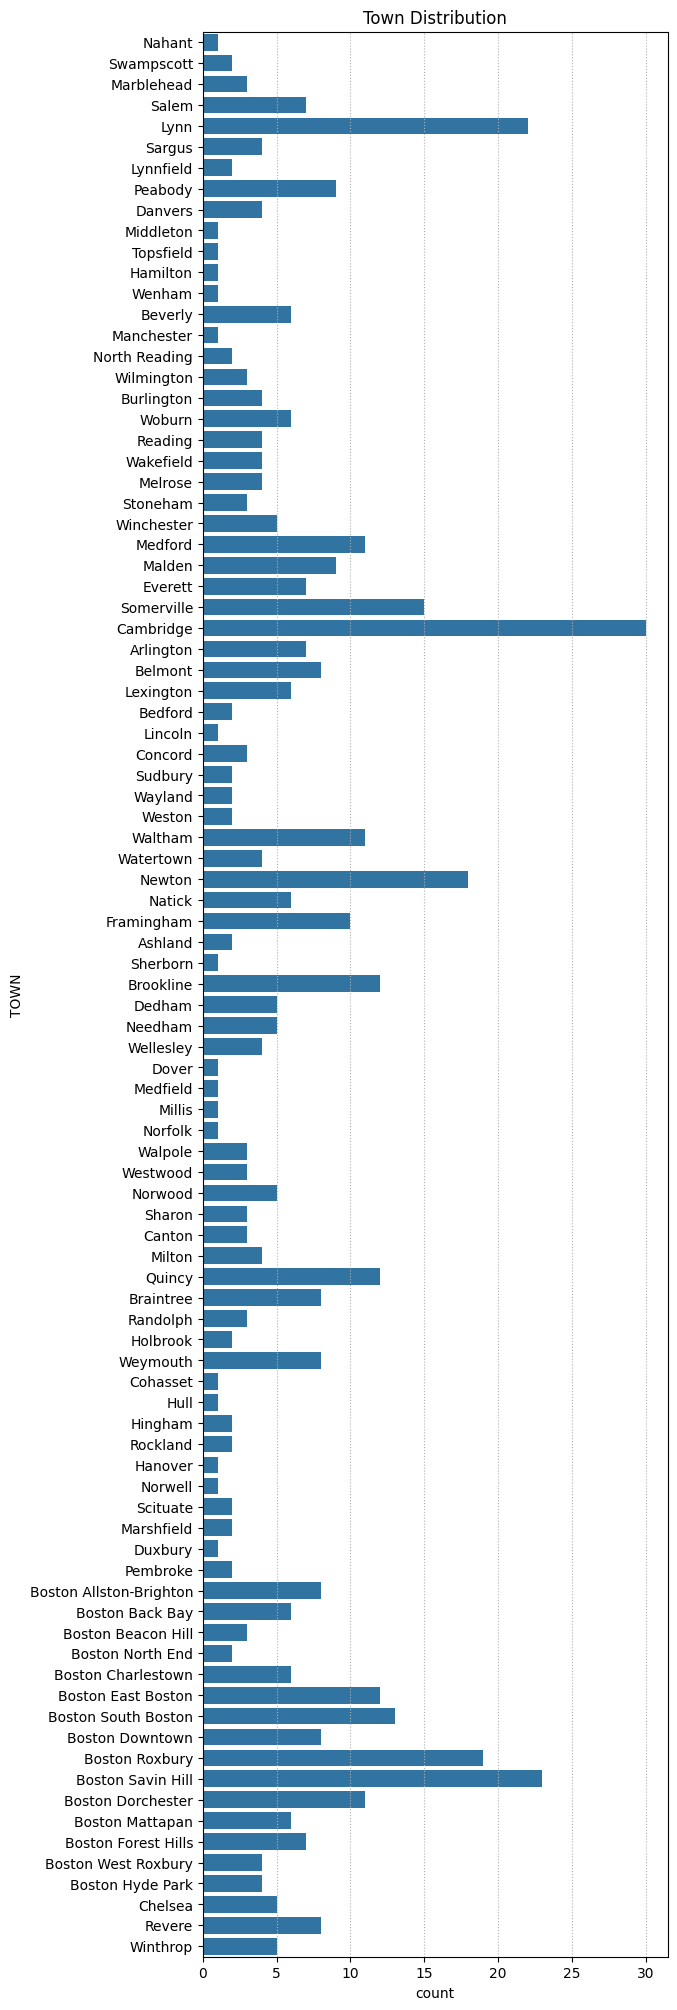

In [41]:
plt.figure(figsize=(6, 25))
sns.countplot(y="TOWN", data=df)
plt.title("Town Distribution")
plt.grid(axis="x", linestyle=":")

After checking the graph, we can observe that the geographical data is noticeably uneven, with most properties lying in Cambridge, Lynn and Boston Savin Hill.

This may be appropriate, if it reflects the actual market, instead of over-representing it.

However, this bias towards these towns could distort the data, especially if it does not represent the actual housing or population data.

Additionally, towns with little data could also suffer from poor analytical accuracy or under-representation if used in a prediction model...

Now, since towns names are not numbers, they cannot be normally used in such models.

Despite this setback, we could convert this data into numerical data that could be computed and that could increase accuracy prediction.

To do that, we could use hot or dummy encoding techniques. I will briefly demonstrate how do it.

However, in order to avoid increasing complexity, we will only demonstrate how to do it, but we wont be using that data, as that would increase our 16 columns to over a 100...

In [42]:
# Here is how to transform the data in TOWN into numerical data that could be used in the prediction algoritm.

#df_tmp = pd.get_dummies(df) # We could have also used this, since Python can handle conditionals True or False as numericals 1 or 0...

df_tmp = pd.get_dummies(df).astype(int)
display(df_tmp.head())

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,...,TOWN_Wayland,TOWN_Wellesley,TOWN_Wenham,TOWN_Weston,TOWN_Westwood,TOWN_Weymouth,TOWN_Wilmington,TOWN_Winchester,TOWN_Winthrop,TOWN_Woburn
0,2011,-70,42,24,0,18,2,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1,2021,-70,42,21,0,0,7,0,0,6,...,0,0,0,0,0,0,0,0,0,0
2,2022,-70,42,34,0,0,7,0,0,7,...,0,0,0,0,0,0,0,0,0,0
3,2031,-70,42,33,0,0,2,0,0,6,...,0,0,0,0,0,0,0,0,0,0
4,2032,-70,42,36,0,0,2,0,0,7,...,0,0,0,0,0,0,0,0,0,0


##2. TRACT: ID Numbers

count: 506. There are 506 values in the TRACT variable. So, 506 IDs.

The average of ID numbers is of no interest to us. So, we will also be skipping such irrelevant variables henceforth.


##3. 4. LON & LAT: Longitude & Latitude
At first sight, there does not seem to be any relevant data, like major discrepancies with the geographical data, unnacounted data or other errors.

##5. MEDV: Median House Value


##6. CRIM: Crime Rate

There is a big discrepancy between the maximum crime rate and the 75% of the data.

75% of the data falls within a crime-rate of 3.677, while the maximum value found was 88.976.

This indicates that, while most of the data is within a small distribution, there may be outliers skewing the data.

There could be many reasons for this. Sometimes there are errors collecting data. Sometimes, there are exceptional events that distort our understanding of the data, in general.

We will have a look at this...















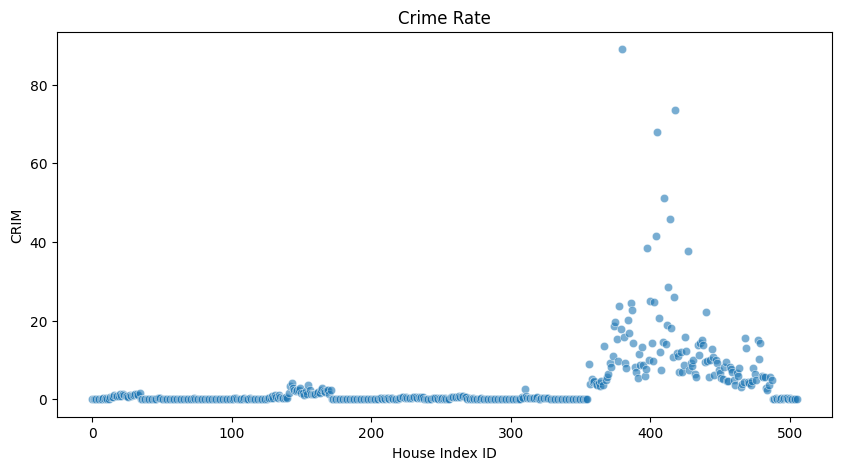

In [43]:
# Since we identified possible issues with, we will plot this data visually to have a better look.

""" boxplots :)
plt.boxplot(df.CRIM, sym="+", whis=[1, 99])
plt.show()
plt.boxplot(df.ZN, sym="+", whis=[1, 99])
plt.show()
"""

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y="CRIM", data=df, marker="o", alpha=0.6)
plt.xlabel("House Index ID")
plt.title("Crime Rate")
plt.show()

# As suspected, there are a few values that are skewing the data. These few datapoints, are less than 1 percent of the data, yet greatly distort it. Especially the average.

##7. ZN: Proportion of Residential Land Zoned

There is significant discrepancy in the zoning ratio distribution.

75% of the data falls within a proportion of 12.50%, while the last 25% reaches %100.

We will also have a look at this...

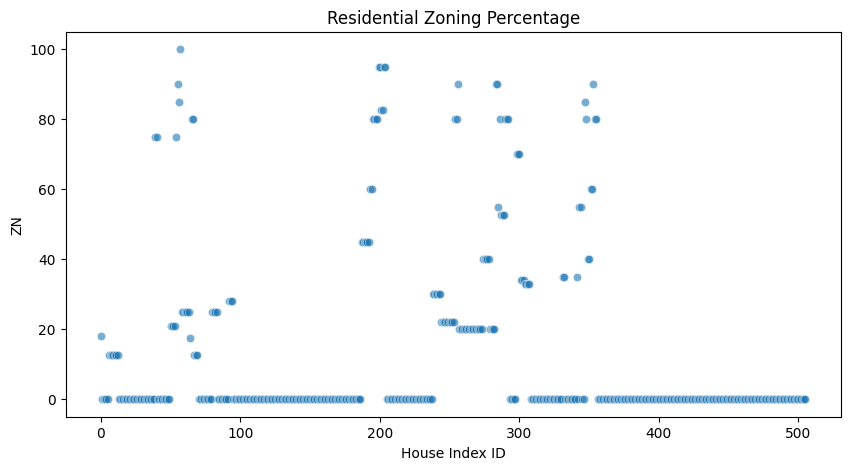

In [44]:
# Since we identified possible issues with, we will plot this data visually to have a better look.

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y="ZN", data=df, marker="o", alpha=0.6)
plt.xlabel("House Index ID")
plt.title("Residential Zoning Percentage")
plt.show()

# It is difficult to believe that all (100%) the land in a town is zoned exclusively for one purpose. Same goes for 0%. This would require investigation that is outside our scope.
# However, since we don't know if the data is invalid and since our purpose is to make predictions with the dataset we are given and since much of the data falls within the 0%, anyway, here and we believe the data is true and keep using the dataset...

##8. INDUS: Proportion of non-retail Business Industry.



##9. CHAS: Bordering Charles River.

We can quicky observe that 75% of the housing properties do not border the river. Possibly more than 75%.




##10. NOX: Nitric Oxides Pollution

##11. RM: The number of rooms in each dwelling.


##12. AGE: Proportion of housing units built before 1940.


##13. DIS: Weighted Distance from Employment Centres


##14. RAD: The highway transport infra-structure in each town (in index of accessibility to radial highways per town).


##15. TAX: Property-tax rate.


##16. PTRATIO: Pupil-Teacher Ratio.

#Preliminar Observations

1. Since each attribute has 506 values, there seems to be no missing or duplicate data to worry about.

2. Data skewing or unevenness was observed on the upper values. Particularly the residential zoning percentages and the outliers found in the crime rate.





#Data Treatment

Now that we quicky scanned the data, we can start treating it. So that things are a bit tidier, whole and clean, before handling it.


##Data Cleanup

###Duplicates

Each attribute has no more than 506 values. So, there seems to be no duplicate data to worry about.

Since, no duplicate data was found, we shall skip this step...

###Non-Computable Data

Some data cannot be easily computed by the algoritm we are using here.

This is the case for TOWN or TRACT, because these are discrete or categorical data, instead of numbers with inherent relationships, like ordinal numbers.

TOWN could be converted into numbers. For example, London could be converted into 2 and Lisbon could be converted into 3.

However, doing this is not optimal, since our algoritm would assume a numerical relationship, where Lisbon (3) has a bigger value than London (2), because, if 3 is higher than 2, these 2 numbers hold a relationship where 3 has a bigger value than 2.

So, instead of assigning numbers for each town that could hold a relationship, we could simply create a variable or column for each town for the machine to compute without assuming a relationship, where each entry would have a 0, if it was not in London, or 1, if it was in London.

This would break up the relationship. However, as you may have noticed, we have dozens of towns in our data. So even though this data could be transformed to be computable to improve prediction accuracy, it is unnecessary to do so and it would overcomplicate things.

So, we will simply remove these from our data, in this specific demo.

In [45]:
# here is how to cleanup non-computable data

del df["TOWN"], df["TRACT"]
display(df.head()) # we should be left with 14 labelled columns

,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


##Missing Data Treatment

Missing data can be hard to compute. Sometimes even impossible, as many machines do not divide by zero.

In such cases, missing data issues can be resolved in a variety of ways.

One way is try to look for the missing data.

However, this can often prove to be too difficult or costly. So, other methods, like filling it with a value that makes sense. These values can vary from zero, the mean, median, mode or another inferred value.

For example, if we had a housing property without zoning data and another housing property in the same town with zoning data, then we could infer that value from the housing property with zoning data.

If we had no precipitation or rainfall for a housing property in one town, it could be reasonable to use data from the nearest town. We could do this ourselves or we could let the machine compute through a k-nearest neighbour (KNN), etc.

If the age of a building was missing, rather than using zero, we could use the global average for that age, the average in that town, etc...

In this case, since each attribute has all 506 values, there seems to be no missing to worry about.

So, we will leave a bonus code demonstrating how to do it, but instead of using that data, we will simply skip to the next step. Enjoy!

In [46]:
#todo copy mean into missing entries
# Here is one possible method we could have used, if we had missing data and wished to fill it with the average.

df_tmp = df["ZN"].head(500).copy()

display(df_tmp.tail()) # only 500 entries. 6 entries are missing

#df2.ZN = df.ZN.fillna(df.ZN.mean()) # this would fill entries with zero or na with the average for the ZN column
df_tmp = df["ZN"].fillna(df.ZN.mean()) # this would fill all the columns with the mean

display(df_tmp.tail())

,ZN
495,0.0
496,0.0
497,0.0
498,0.0
499,0.0


,ZN
501,0.0
502,0.0
503,0.0
504,0.0
505,0.0


##Outlier Treatment

Data skewing or unevenness was observed on the upper values. Particularly the residential zoning percentages and the outliers found in the crime rate.

Generally, disregarding, erasing or editing data is discouraged.

However, since our goal is to make predictions and since outliers undermine prediction accuracy, we have strong reasons to do so.

There are many ways to deal with outliers or fliers.

One way is to limit or cap their values. For example, we can limit the maximum value to a percentile, like 1.5 times the 75th percentile (interquartile range), 85 percentile, 99th percentile, 3 times over the 99th percentile, etc.

We could also limit the minimum values to the 1st percentile or 0.3 times this value and so on...

The exact limits depend on the context, like the purpose of the limitation, and can appear arbitrary.

There are other approaches, like exponential smoothing. Here, we will be conservative and adopt a 99th percentile method.


In [47]:
# First, we can start by defining and storing the values we wish to limit. In this case, 99th percentile from the data stored in our dataset (df)

crim_max_cap = np.percentile(df.CRIM, [99])[0]
zn_max_cap = np.percentile(df.ZN, [99])[0]
#crime_max_cap = np.percentile(df.CRIM, [85])[0] * 1.5 # Just another way to do it, which we wont be implementing.

print("The crime rate upper limit is:", crim_max_cap)
print("The zoning upper limit is:", zn_max_cap)


The crime rate upper limit is: 41.37032999999997
The zoning upper limit is: 90.0


In [48]:
# After defining the upper limits, we can start applying them to our data.

# The following entries exceed the limit and will be capped
#display("Entries exceeding limits:", df[(df.CRIM > crim_max_cap) | (df.ZN > zn_max_cap)][['CRIM', 'ZN']])

display("Crime Rates Outliers:", df[(df.CRIM > crim_max_cap)][["CRIM"]])
#df.loc[(df.CRIM > crim_max_cap)] = crim_max_cap #deprecated
df.loc[df["CRIM"] > crim_max_cap, "CRIM"] = crim_max_cap

print("\n")

display("Zoning Proportions Outliers", df[(df.ZN > zn_max_cap)][["ZN"]])
#df[(df.ZN > zn_max_cap)] = zn_max_cap #deprecated
df.loc[df["ZN"] > crim_max_cap, "ZN"] = zn_max_cap

#Now if we check our data, again. We will see that those outliers are gone.
print("\n\nTreated Data EDD")
df[["CRIM", "ZN"]].describe()

#We could do another pass or change the threshold from 99 to 85 and so on. However, we are taking a conservative approach in data manipulation. So, we will leave it as it is, even if it remains a bit skewed.


'Crime Rates Outliers:'

,CRIM
380,88.9762
404,41.5292
405,67.9208
410,51.1358
414,45.7461
418,73.5341


'Zoning Proportions Outliers'

,ZN
57,100.0
199,95.0
200,95.0
203,95.0
204,95.0




Treated Data EDD


,CRIM,ZN
count,506.000000,506.000000
mean,3.375144,13.058300
std,6.908985,27.457078
min,0.006320,0.000000
25%,0.082045,0.000000
50%,0.256510,0.000000
75%,3.677083,12.500000
max,41.370330,90.000000


# Correlation Analysis

Now that we analized each attribute or variable, independently, we will examine their relationship with the other variables.

This examination will be done in pairs (bivariate analysis). So, two variables or attributes at a time, instead of one, like before.

Doing this should help us visualize and understand if there is a relationship or pattern between them that could help in making predictions.

Of course, the machine can calculate these patterns without going through most of these steps.

However, this helps us understand things and we might use this understanding to supervise and improve what the machine is "learning" or doing.

Here, we will perform 2 methods.

First, we will plot the pairs visually and see if we spot a visual relationship.

If we find a non-linear relationship, we might want to consider transforming them into a linear one for computation.

In the second method, we will calculate their numerical linear relationship (correlation metrics).

If no relationships are found, we should consider things like ponder where relationships could be or getting more and better data.

Since it is the price that we want to predict, we will focus on that.




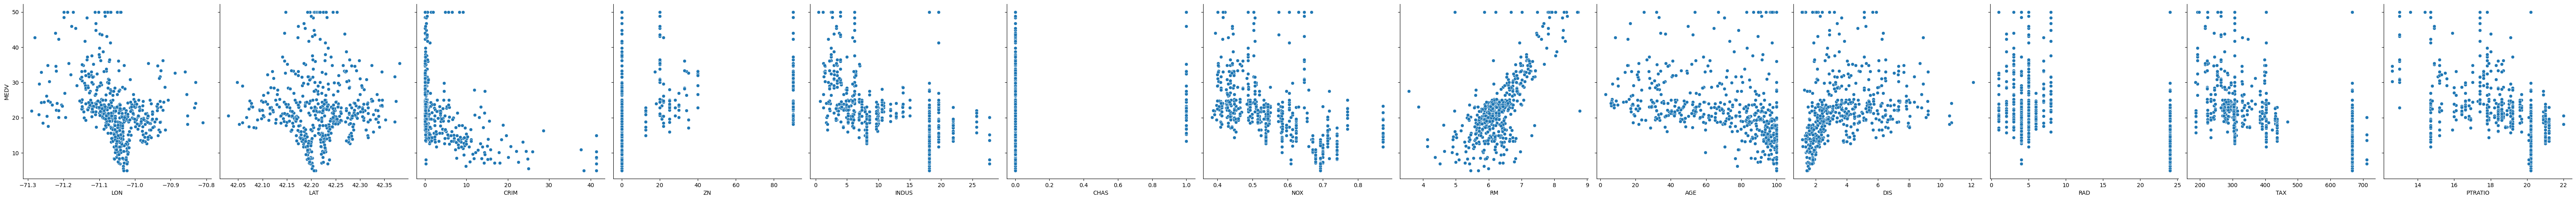

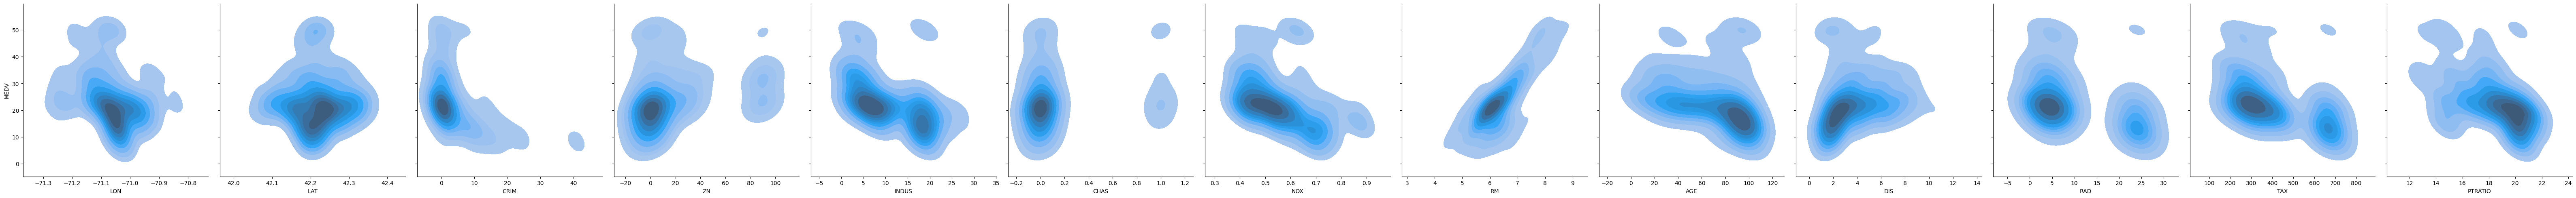


 Looks like we may have found something. Look:


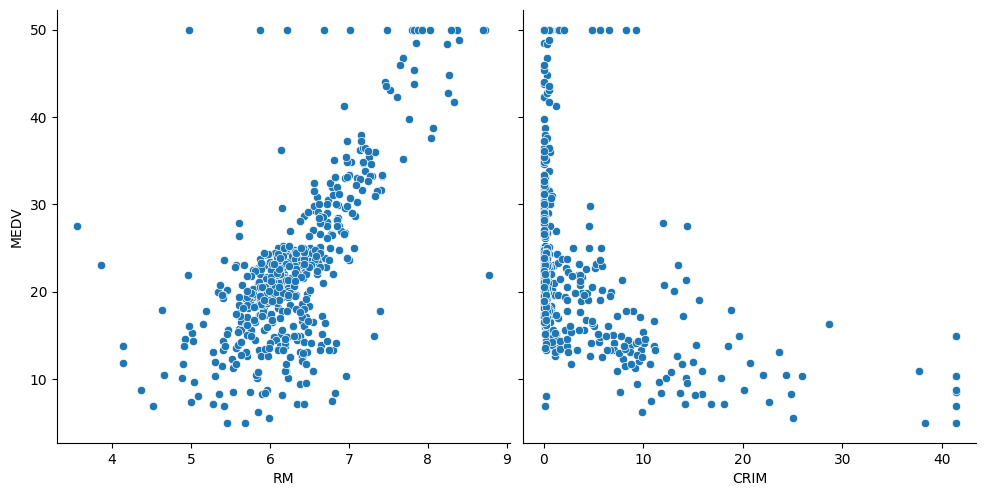

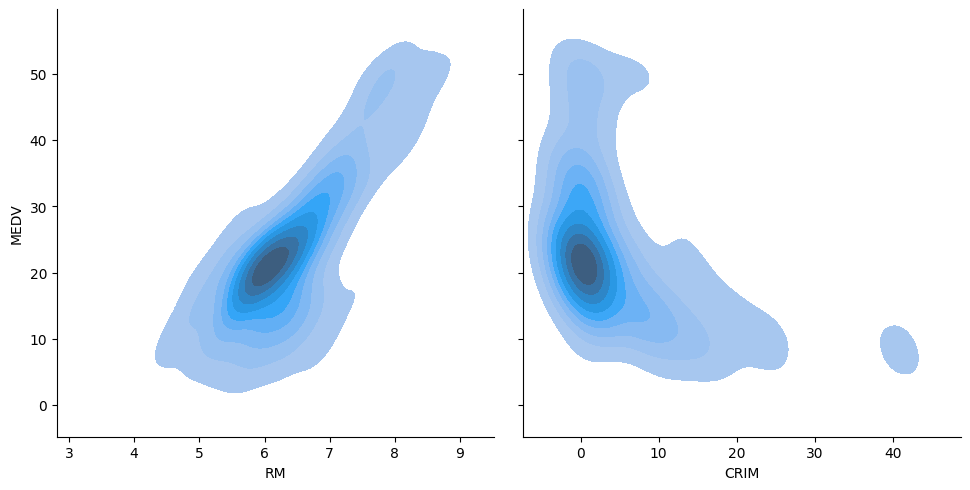

In [49]:
#@title Visual Correlations

#scatter plot
sns.pairplot(df, height=5, y_vars=["MEDV"], x_vars=[col for col in df.columns if col != "MEDV" and col != "TOWN"])
plt.show()

# density plot, due to large ammount of datapoints (506)
g1 = sns.PairGrid(df, height=5, y_vars=["MEDV"], x_vars=[col for col in df.columns if col not in ["MEDV"]]) # Excluding MEDV from x_vars to avoid self-correlation
g1.map(sns.kdeplot, fill=True) # Using g.map() to apply density plots to all subplots in the row
plt.show()

print("\n Looks like we may have found something. Look:")

# scatter plot. price vs rooms, crime
sns.pairplot(df, height=5, y_vars=["MEDV"], x_vars=["RM", "CRIM"])

# density plot. price vs rooms, crime
g2 = sns.PairGrid(df, height=5, y_vars=["MEDV"], x_vars=["RM", "CRIM"])
g2.map(sns.kdeplot, fill=True)
plt.show()


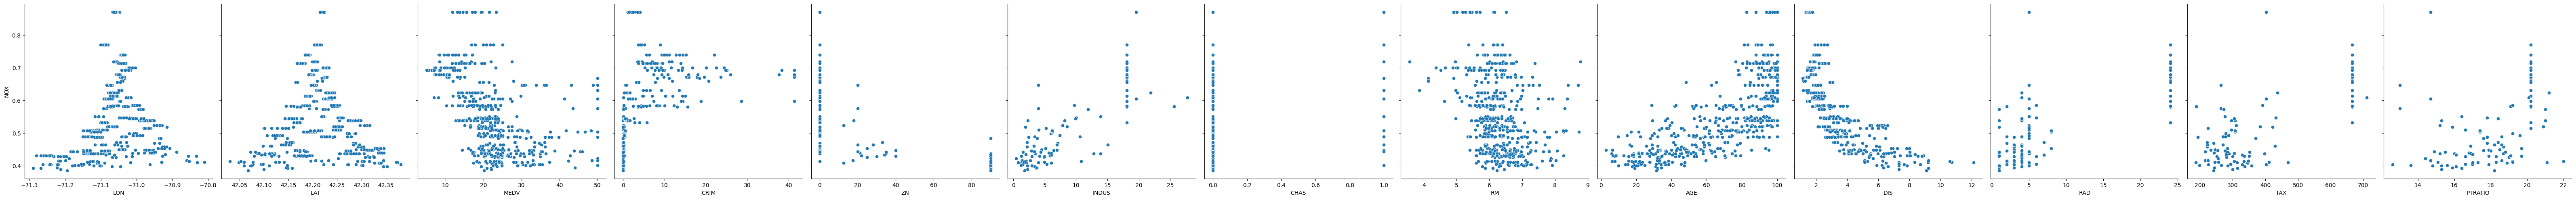

In [50]:
# for the curious, feel free to check out the other features...

""" All features: Simple Features
#sns.pairplot(df, height=5)
plt.show()
"""

""" All features 2: Advanced Features
g = sns.PairGrid(df, height=5)
g.map_lower(sns.scatterplot, alpha=0.3) # Scatter plots with transparency on the lower triangle
g.map_upper(sns.kdeplot, fill=True) # Density plots on the upper triangle
g.map_diag(sns.histplot, kde=True) # Histograms with KDE on the diagonal
plt.show()
"""
print()

# pollution
sns.pairplot(df, height=5, y_vars=["NOX"], x_vars=[col for col in df.columns if col != "NOX" and col != "TOWN"])
plt.show()


In [51]:
#@title Correlation Metrics

#df.corr() # all correlations
#df.corr()["NOX"] # pollution
#df.corr()["MEDV"] # price
df.corr()[["MEDV", "NOX"]] # price & pollution

# relationship:
# very weak <0.10
# weak <0.20
# strong >0.80
# very strong >0.90


,MEDV,NOX
LON,-0.322947,0.160871
LAT,0.006826,-0.068600
MEDV,1.000000,-0.429300
CRIM,-0.434203,0.488862
ZN,0.341028,-0.509665
INDUS,-0.484754,0.763651
CHAS,0.175663,0.091203
NOX,-0.429300,1.000000
RM,0.696304,-0.302188
AGE,-0.377999,0.731470



There seems to be general trends or relationships between the price (MEDV) and:
* ROOMS: a positive and proportional relationship. The more one increases, so does the other.
* CRIM, NOX: a slight logaritmic relationship, where the trend is a higher price when there are lower crime rates or pollution values. The price decreases, as the crime rate and pollution increase, but the price decrease becomes less significant as the other 2 increase.

There are other relationships, like pollution levels (NOX) and the employment centers (DIS), industry (INDUS), building age (AGE)...

As interesting as that might be to explore, since our focus are the prices, that is where we will focus.



Values closer to 1 or -1 will play a bigger role in computing predictions, whereas those closer to 0 will play a lesser role...




There are many possible techniques. Our algorithm will use simple linear regression.


Simple linear regression uses a single predictor (x variable) to predict outcomes (y variable), assuming there is an aproximate linear relationship between x and y.

So, we could take ROOMS as our single predictor.

Least square approach, because we will be minimize error by squaring...






#Prediction Algorythm: Linear Regreassion

In [52]:
import statsmodels.api as sn #learning model

# add to describe linear regression model
X = sn.add_constant(df["RM"])
lm = sn.OLS(df["MEDV"], X).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           1.31e-74
Time:                        17:56:31   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
RM             9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:

from sklearn.linear_model import LinearRegression
y = df["MEDV"]
X = df[["RM"]]
lm2 = LinearRegression()
lm2.fit(X,y)
print(lm2.intercept_, lm2.coef_)

-34.6592431230972 [9.09966966]
